### Idea of an SVM 

In [2]:
## Importing from Sklearn
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import requests

## Creating a dataset
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.4)

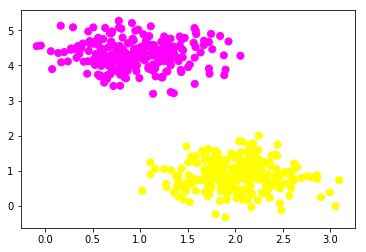

In [3]:
## Make Plot
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="spring")
plt.show()

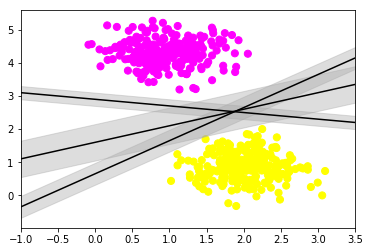

In [4]:
## Creating a line between the blobs 
xfit = np.linspace(-1, 3.5)

## Plot Scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="spring")

## 
for m, b, d in [(1,0.65,0.33), (0.5,1.6,0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit+b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1,3.5)
plt.show()

### Fitting an SVM

In [24]:
## Import Support Vector Classifier (SVC)
from sklearn.svm import SVC
import pandas as pd
from StringIO import StringIO

data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
s = StringIO(requests.get(data).content)
df = pd.read_csv(s)
a = np.array(df)

## Save Response Vector and remove it from pandas column
y = a[:,10]
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

### Other SVM Tutorial

In [39]:
from matplotlib import style
style.use("fivethirtyeight")

In [40]:
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])

y = [0,1,0,1,0,1]


In [43]:
clf = SVC(kernel='linear', C = 1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
print(clf.predict([[0.58,0.76]]))

[0]


In [49]:
print(clf.predict([[10.58,10.76]]))


[1]


[ 0.1380943   0.24462418]


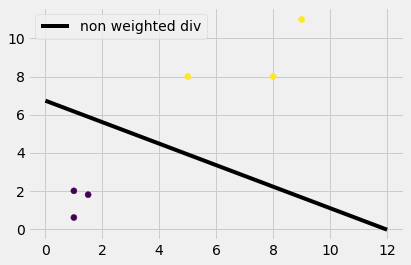

In [50]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()